<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option("display.max_columns", None)

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [11]:
CSV = False
if CSV:
    df = pd.read_csv("dst-3.0_16_1_hh_database.csv", sep=";")
else:
    %pip install fastparquet
    yandex_parquet = "https://s328vla.storage.yandex.net/rdisk/92de85af5065538b22690997f587ff2f9aec2392f6149767332a7ce5377ecd18/690285f2/-VSPRZR-iAOme0B-_p0fUSvJfSRtVIXr8z4Vp83Ke9-1TuNgpNWOhe1gE-CdaMG-zKeOQ2FfaHZGJCMkkVjtCw==?uid=0&filename=hh_data.parquet&disposition=attachment&hash=R%2BXi9HhRaeZMfdPme3Lu4PVNF/Nr0WF6LCMAqveNXrGor0F5TDF200/ib3iqQ13cq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Foctet-stream&owner_uid=1704502798&fsize=134077003&hid=5a206ddc39a2cc1bc34ede4c14c1873b&media_type=executable&tknv=v3&ts=64252c057e080&s=67e2688924829f7e63c2e79ce578dc5ca3784dcbf5dad4b4f3a0404c94b1dfee&pb=U2FsdGVkX18ShZ5oA6iWE2InAZ-xfoM9Hs7HsfdM68EByvRTl9f8njiAPO8Pzmgg3lP9PWya0dQHqYTubTDsCTanluuadEmPz4i4zJlbBTk"
    df = pd.read_parquet(yandex_parquet, engine="fastparquet")
df_duplicates = df.copy()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [12]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [13]:
display(df.info())
display(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Пол, возраст                       object
ЗП                                 object
Ищет работу на должность:          object
Город, переезд, командировки       object
Занятость                          object
График                             object
Опыт работы                        object
Последнее/нынешнее место работы    object
Последняя/нынешняя должность       object
Образование и ВУЗ                  object
Обновление резюме                  object
Авто                               object
dtype: object

4. Обратите внимание на информацию о числе непустых значений.

In [14]:
df.isna().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [15]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [16]:
def get_degree(text):
    first_words = text.split(" ")[:3]

    if first_words[2].lower() == "образование":
        return (first_words[0] + " " + first_words[1]).lower()
    return first_words[0].lower()


df["Образование"] = df["Образование и ВУЗ"].apply(get_degree)
df.drop("Образование и ВУЗ", axis=1, inplace=True)
df["Образование"].value_counts()

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


Пол
М    36211
Ж     8533
Name: count, dtype: int64

<Axes: xlabel='Возраст'>

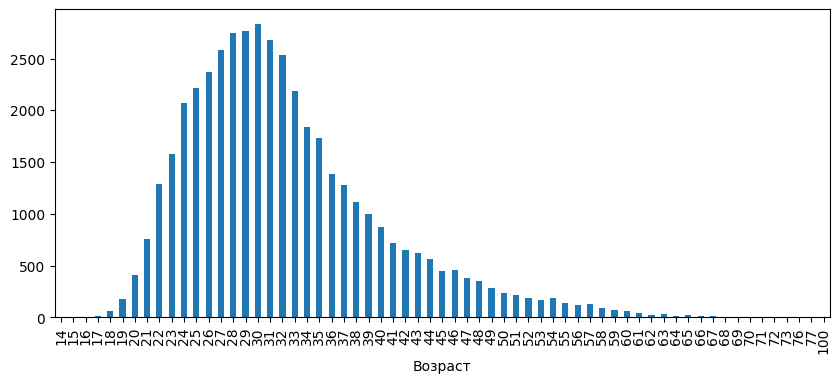

In [17]:
def get_sex(text):
    if text.startswith("М"):
        return "М"
    return "Ж"


def get_age(text):
    age = text.split(" , ")[1]
    return int(age.split()[0])


df["Пол"] = df["Пол, возраст"].apply(get_sex)
df["Возраст"] = df["Пол, возраст"].apply(get_age)
df.drop("Пол, возраст", axis=1, inplace=True)

display(df["Пол"].value_counts())
display(df["Возраст"].value_counts().sort_index().plot(kind="bar", figsize=(10, 4)))

In [18]:
display(round(df["Пол"].value_counts() / df.shape[0] * 100, 2))
display(round(df["Возраст"].mean(), 1))

Пол
М    80.93
Ж    19.07
Name: count, dtype: float64

np.float64(32.2)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [19]:
df.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26


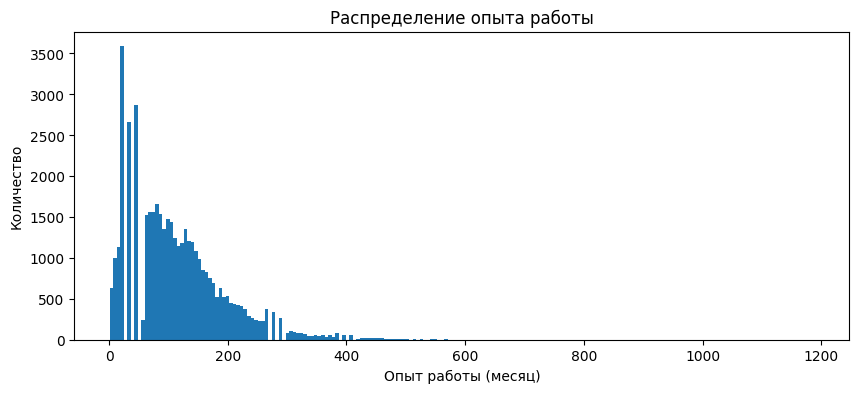

In [20]:
import re

pattern = re.compile(
    r"опыт работы\s+"
    r"(?:(?P<years>\d+)\s*(?:год|года|лет))?"
    r"\s*"
    r"(?:(?P<months>\d+)\s*(?:месяц|месяца|месяцев|мес))?",
    flags=re.IGNORECASE,
)


def get_experience(text: str):
    if text is np.nan or pd.isna(text):
        return np.nan
    if text == "Не указано":
        return np.nan

    match = pattern.search(text)

    if not match:
        return np.nan

    years = match.group("years")
    months = match.group("months")

    years = int(years) if years else 0
    months = int(months) if months else 0

    return years * 12 + months


df["Опыт работы (месяц)"] = df["Опыт работы"].apply(get_experience)
df.drop("Опыт работы", axis=1, inplace=True)

plt.figure(figsize=(10, 4))
df["Опыт работы (месяц)"].dropna().plot(kind="hist", bins=200)
plt.xlabel("Опыт работы (месяц)")
plt.ylabel("Количество")
plt.title("Распределение опыта работы")
plt.show()

In [21]:
df["Опыт работы (месяц)"].median()

np.float64(100.0)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [22]:
million_cities = {
    "Новосибирск",
    "Екатеринбург",
    "Нижний Новгород",
    "Казань",
    "Челябинск",
    "Омск",
    "Самара",
    "Ростов-на-Дону",
    "Уфа",
    "Красноярск",
    "Пермь",
    "Воронеж",
    "Волгоград",
}


def get_city(text):
    text = text.split(",")[0].strip()

    if text == "Москва":
        return "Москва"

    if text == "Санкт-Петербург":
        return "Санкт-Петербург"

    if text in million_cities:
        return "город-миллионник"

    return "другие"


def get_reloc(text):
    t = text.lower()

    # не готов
    if re.search(r"не\s+готов[а]?\s+к?\s*переез", t):
        return False

    # готов
    if re.search(r"(переезд|переехать)", t):
        return True

    return False


def get_business(text: str):
    t = text.lower()

    # не готов
    if re.search(r"не\s+готов[а]?\s+к?\s*команд", t):
        return False

    # готов
    if re.search(r"готов[а]?\s+.*команд", t):
        return True

    return False


df["Город"] = df["Город, переезд, командировки"].apply(get_city)
df["Готовность к переезду"] = df["Город, переезд, командировки"].apply(get_reloc)
df["Готовность к командировкам"] = df["Город, переезд, командировки"].apply(
    get_business
)

df.drop(columns=["Город, переезд, командировки"], inplace=True)
display(df["Город"].unique())
display(df["Готовность к переезду"].unique())
display(df["Готовность к командировкам"].unique())

array(['другие', 'Москва', 'город-миллионник', 'Санкт-Петербург'],
      dtype=object)

array([False,  True])

array([False,  True])

In [23]:
display(round(df["Город"].value_counts() / df.shape[0] * 100))
display(
    round((df["Готовность к переезду"] & df["Готовность к командировкам"]).mean() * 100)
)

Город
Москва              37.0
другие              35.0
город-миллионник    16.0
Санкт-Петербург     11.0
Name: count, dtype: float64

32

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [24]:
dummmy = df["Занятость"].str.get_dummies(sep=", ")
df = pd.concat((df, dummmy), axis=1)
df.drop("Занятость", inplace=True, axis=1)

dummmy = df["График"].str.get_dummies(sep=", ")
df = pd.concat((df, dummmy), axis=1)
df.drop("График", inplace=True, axis=1)

df.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,волонтерство,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,0,1,1,0,1,1,1,1,1,1
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True,0,1,1,0,1,0,1,1,1,1
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,0,1,0,0,0,0,0,1,0,0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True,0,1,1,0,1,0,1,0,0,1
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True,0,1,0,0,0,0,0,1,0,0


In [25]:
display((df["проектная работа"] & df["волонтерство"]).sum())
display((df["вахтовый метод"] & df["гибкий график"]).sum())

np.int64(436)

np.int64(2311)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [27]:
currency = pd.read_csv("ExchangeRates.csv", parse_dates=True)

df["Обновление резюме"] = pd.to_datetime(df["Обновление резюме"], dayfirst=True).dt.date
currency["date"] = pd.to_datetime(currency["date"], format="%d/%m/%y").dt.date

currency.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,2017-12-29,00:00,57.6291,0,1
1,USD,D,2017-12-30,00:00,57.6002,0,1
2,USD,D,2017-12-31,00:00,57.6002,0,1
3,USD,D,2018-01-01,00:00,57.6002,0,1
4,USD,D,2018-01-02,00:00,57.6002,0,1


In [28]:
mapping = {
    "руб": "RUB",
    "грн": "UAH",
    "us": "USD",
    "eu": "EUR",
    "бел.руб": "BYN",
    "kg": "KGS",
    "су": "UZS",
    "az": "AZN",
    "kz": "KZT",
}


def parse_salary(text):

    m = re.search(r"(\d+)\s*([A-Za-zА-Яа-я\.]+)", text)

    amount = float(m.group(1))
    currency = m.group(2).lower()[0:-1]

    return amount, currency


df[["salary_amount", "salary_currency"]] = df["ЗП"].apply(
    lambda x: pd.Series(parse_salary(x))
)
df["currency"] = df["salary_currency"].map(mapping)

df = df.merge(
    currency.rename(columns={"date": "Обновление резюме"}),
    on=["Обновление резюме", "currency"],
    how="left",
)
df.loc[df["currency"] == "RUB", "close"] = 1
df.loc[df["currency"] == "RUB", "proportion"] = 1

df["ЗП (руб)"] = df["salary_amount"] * df["close"] / df["proportion"]

df.drop(
    [
        "salary_amount",
        "salary_currency",
        "currency",
        "per",
        "time",
        "close",
        "vol",
        "proportion",
        "ЗП",
    ],
    axis=1,
    inplace=True,
)

In [29]:
df["ЗП (руб)"].median()

np.float64(59019.0)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

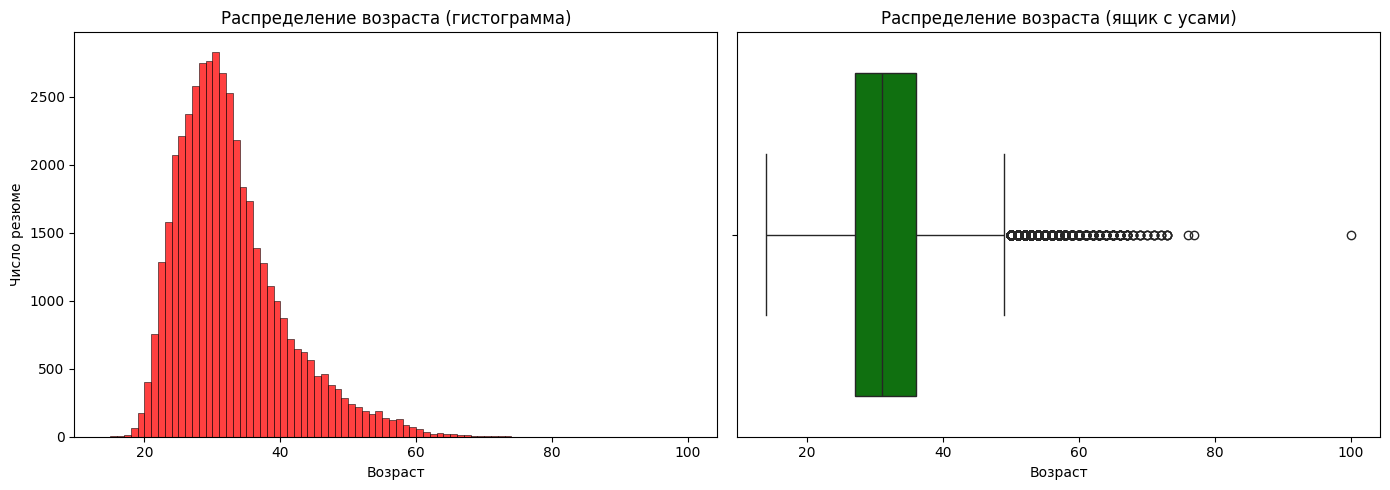

Мода: 30
Мин/макс: 14, 100
Основной интервал (Q1–Q3): 27.0 – 36.0
Границы выбросов: 13.5 – 49.5
Количество выбросов: 1774 (минимум 50, максимум 100)


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

age = df["Возраст"]

sns.histplot(age, bins=range(14, 101), kde=False, ax=axes[0], color="red")

axes[0].set_title("Распределение возраста (гистограмма)")
axes[0].set_xlabel("Возраст")
axes[0].set_ylabel("Число резюме")

sns.boxplot(x=age, ax=axes[1], color="green")
axes[1].set_title("Распределение возраста (ящик с усами)")
axes[1].set_xlabel("Возраст")

plt.tight_layout()
plt.show()

mode_age = age.mode().iloc[0]
age_min = age.min()
age_max = age.max()
q1, median, q3 = age.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = age[(age < lower_fence) | (age > upper_fence)]

print(f"Мода: {mode_age}")
print(f"Мин/макс: {age_min}, {age_max}")
print(f"Основной интервал (Q1–Q3): {q1} – {q3}")
print(f"Границы выбросов: {lower_fence} – {upper_fence}")
print(
    f"Количество выбросов: {outliers.count()} (минимум {outliers.min()}, максимум {outliers.max()})"
)

Средний возраст - 30 лет\
Основная масса в районе 26-33 лет\
Видим хвост среди старших\
Есть выборсы в районе 50 - 100 лет

Основная часть кандидатов - в возрасте 27–36 лет, что соответствует наиболее активной части рынка труда


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

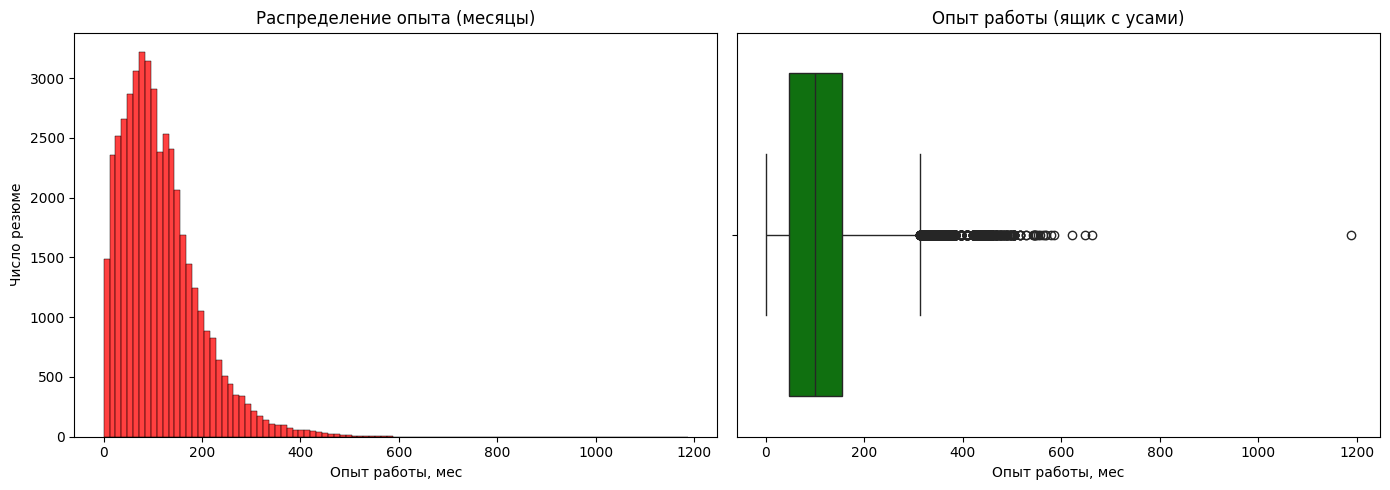

Мода: 48.0
Мин/макс: 1.0, 1188.0
Основной интервал (Q1–Q3): 48.0–154.0
Границы выбросов: -111.0 – 313.0
Количество выбросов: 1020 (макс 1188.0)


In [31]:
experience = df["Опыт работы (месяц)"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bins = np.arange(0, experience.max() + 12, 12)
sns.histplot(experience, bins=bins, ax=axes[0], color="red")
axes[0].set_title("Распределение опыта (месяцы)")
axes[0].set_xlabel("Опыт работы, мес")
axes[0].set_ylabel("Число резюме")

sns.boxplot(x=experience, ax=axes[1], color="green")
axes[1].set_title("Опыт работы (ящик с усами)")
axes[1].set_xlabel("Опыт работы, мес")

plt.tight_layout()
plt.show()

mode_exp = experience.mode().iloc[0]
exp_min = experience.min()
exp_max = experience.max()
q1, median, q3 = experience.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = experience[(experience < lower_fence) | (experience > upper_fence)]

print(f"Мода: {mode_exp}")
print(f"Мин/макс: {exp_min}, {exp_max}")
print(f"Основной интервал (Q1–Q3): {q1:}–{q3:}")
print(f"Границы выбросов: {lower_fence:} – {upper_fence:}")
print(f"Количество выбросов: {outliers.count()} (макс {outliers.max()})")

Распределение правостороннее
Больше 300 месяцев работы можно считать за выбросы


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


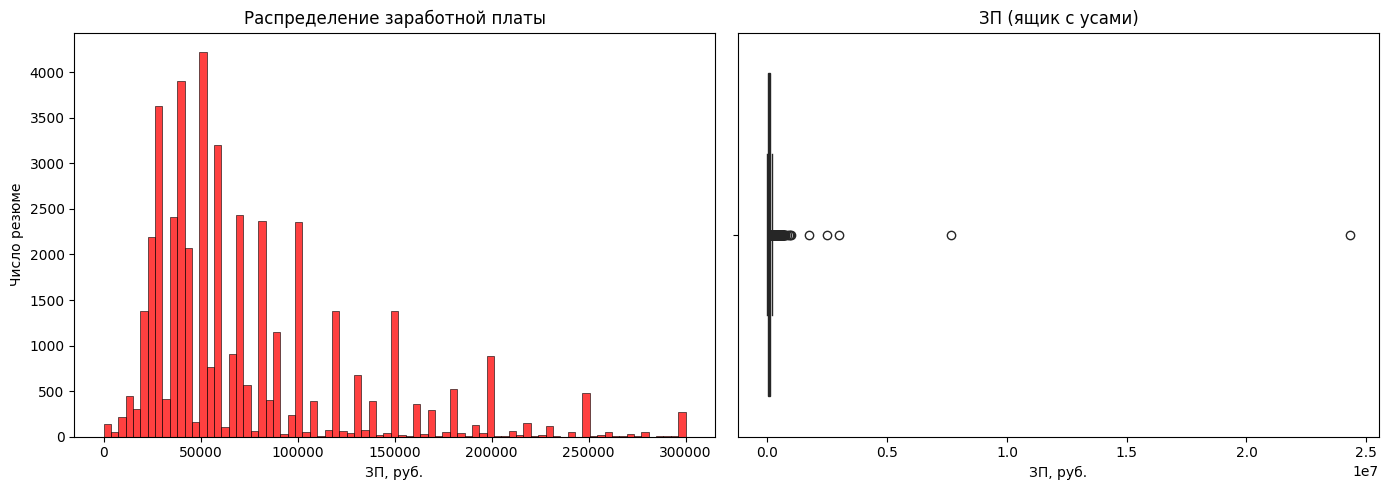

Мода: 50000
Мин/макс: 1, 24304876
Основной интервал (Q1–Q3): 37082–95000
Границы выбросов: -49795 – 181877
Количество выбросов: 2781 (макс 24304876)


In [32]:
salary = df["ЗП (руб)"].dropna().astype(float)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bins = np.linspace(0, salary.quantile(0.99), 80)
sns.histplot(salary, bins=bins, ax=axes[0], color="red")
axes[0].set_title("Распределение заработной платы")
axes[0].set_xlabel("ЗП, руб.")
axes[0].set_ylabel("Число резюме")

sns.boxplot(x=salary, ax=axes[1], color="green")
axes[1].set_title("ЗП (ящик с усами)")
axes[1].set_xlabel("ЗП, руб.")

plt.tight_layout()
plt.show()

mode_salary = salary.mode().iloc[0]
sal_min = salary.min()
sal_max = salary.max()
q1, median, q3 = salary.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = salary[salary > upper_fence]

print(f"Мода: {mode_salary:.0f}")
print(f"Мин/макс: {sal_min:.0f}, {sal_max:.0f}")
print(f"Основной интервал (Q1–Q3): {q1:.0f}–{q3:.0f}")
print(f"Границы выбросов: {lower_fence:.0f} – {upper_fence:.0f}")
print(f"Количество выбросов: {outliers.count()} (макс {outliers.max():.0f})")

Распределение смещено вправо, сильно маленькая зарплата выглядит как ошибка, 24млн выглядит как нереалистичный запрос

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

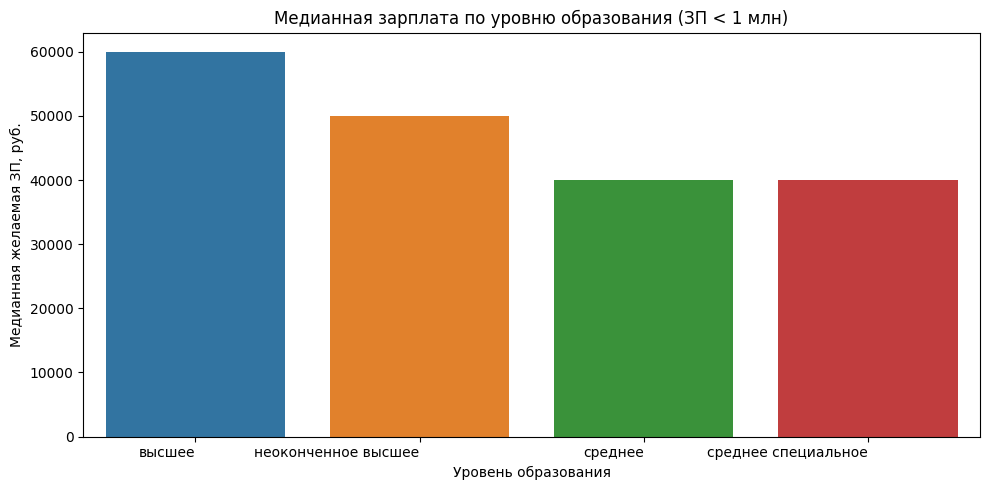

Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


In [33]:
filtered = df.loc[df["ЗП (руб)"] < 1_000_000, ["ЗП (руб)", "Образование"]].dropna()
median_salary = (
    filtered.groupby("Образование")["ЗП (руб)"].median().sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=median_salary.index, y=median_salary.values, hue=median_salary.index)
plt.xlabel("Уровень образования")
plt.ylabel("Медианная желаемая ЗП, руб.")
plt.title("Медианная зарплата по уровню образования (ЗП < 1 млн)")
plt.xticks(ha="right")
plt.tight_layout()
plt.show()

print(median_salary)

У людей с высшим образованием выше запросы, у людей с неоконченным чуть ниже

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

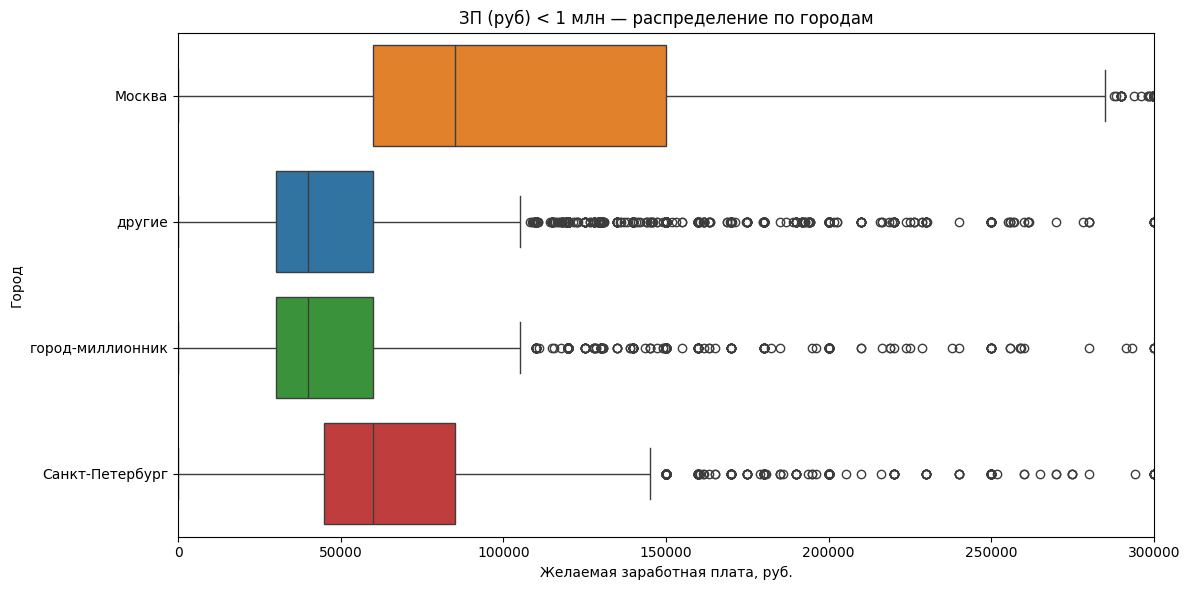

Город
Москва              85000.0
Санкт-Петербург     60000.0
город-миллионник    40000.0
другие              40000.0
Name: ЗП (руб), dtype: float64


In [34]:
salary_cut = df[df["ЗП (руб)"] < 1_000_000][["ЗП (руб)", "Город"]].dropna()

top_cities = salary_cut["Город"].value_counts().index
plot_data = salary_cut[salary_cut["Город"].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data, x="ЗП (руб)", y="Город", order=top_cities, hue="Город")
plt.title("ЗП (руб) < 1 млн — распределение по городам")
plt.xlabel("Желаемая заработная плата, руб.")
plt.ylabel("Город")
plt.xlim(0, plot_data["ЗП (руб)"].quantile(0.99))
plt.tight_layout()
plt.show()

median_by_city = (
    plot_data.groupby("Город")["ЗП (руб)"].median().sort_values(ascending=False)
)
print(median_by_city)

In [35]:
salary_above_million = (df["ЗП (руб)"] > 1_000_000).sum()
print(f"Соискателей с ЗП > 1,000,000 руб: {salary_above_million}")

Соискателей с ЗП > 1,000,000 руб: 5


В Москве медиана зарплат выше всего и разброс тоже широкий, с спб разброс почти как у остальных городов, но в среднем ожидания выше

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

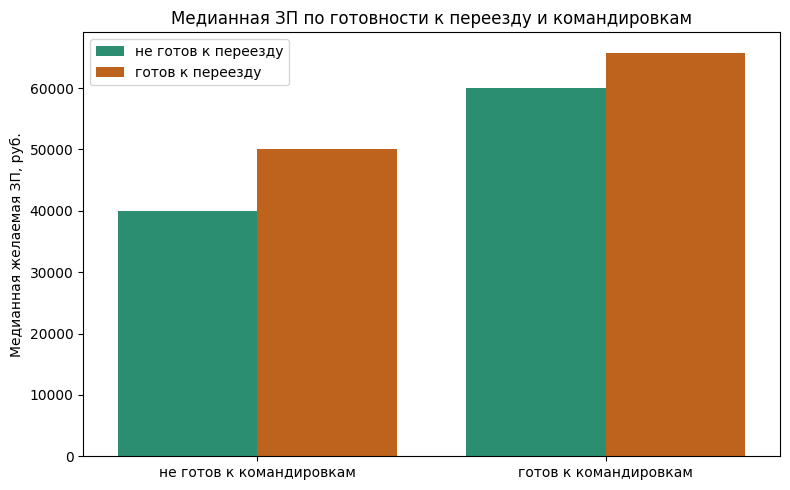

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
3,готов к переезду,готов к командировкам,65798.91
1,не готов к переезду,готов к командировкам,60000.00
2,готов к переезду,не готов к командировкам,50000.00
0,не готов к переезду,не готов к командировкам,40000.00


In [36]:
subset = df[
    ["ЗП (руб)", "Готовность к переезду", "Готовность к командировкам"]
].dropna()

median_pay = (
    subset.groupby(["Готовность к переезду", "Готовность к командировкам"])["ЗП (руб)"]
    .median()
    .reset_index()
)

median_pay["Готовность к переезду"] = median_pay["Готовность к переезду"].map(
    {True: "готов к переезду", False: "не готов к переезду"}
)
median_pay["Готовность к командировкам"] = median_pay["Готовность к командировкам"].map(
    {True: "готов к командировкам", False: "не готов к командировкам"}
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=median_pay,
    x="Готовность к командировкам",
    y="ЗП (руб)",
    hue="Готовность к переезду",
    palette="Dark2",
)
plt.ylabel("Медианная желаемая ЗП, руб.")
plt.xlabel("")
plt.title("Медианная ЗП по готовности к переезду и командировкам")
plt.legend(title="")
plt.tight_layout()
plt.show()

display(median_pay.sort_values("ЗП (руб)", ascending=False))

Мобильность повышает ожидания по оплате

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

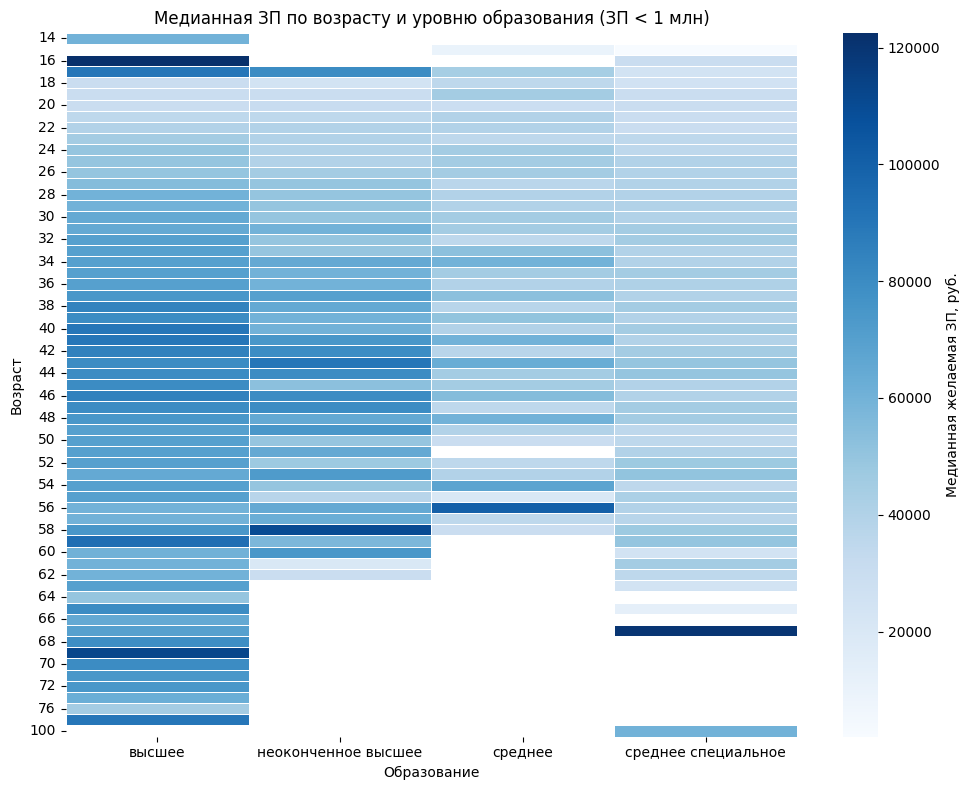

Образование,высшее,неоконченное высшее,среднее,среднее специальное
Возраст,,,,
14,60000.00,NaN,NaN,NaN
15,NaN,NaN,10000.0,2000.0
16,122582.49,NaN,NaN,30000.0
17,90075.50,80000.0,44000.0,25000.0
18,30000.00,25000.0,35000.0,25151.0
...,...,...,...,...
72,75000.00,NaN,NaN,NaN
73,62500.00,NaN,NaN,NaN
76,45000.00,NaN,NaN,NaN


In [37]:
sub = df[["Возраст", "Образование", "ЗП (руб)"]].dropna()

pivot = sub.pivot_table(
    index="Возраст", columns="Образование", values="ЗП (руб)", aggfunc="median"
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot,
    cmap="Blues",
    linewidths=0.4,
    linecolor="white",
    cbar_kws={"label": "Медианная желаемая ЗП, руб."},
)
plt.title("Медианная ЗП по возрасту и уровню образования (ЗП < 1 млн)")
plt.xlabel("Образование")
plt.ylabel("Возраст")
plt.tight_layout()
plt.show()

pivot

Во всех возрастах люди с высшим запрашивают больше зп, чем выше возраст тем интенсивнее по графику люди просят больше денег

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

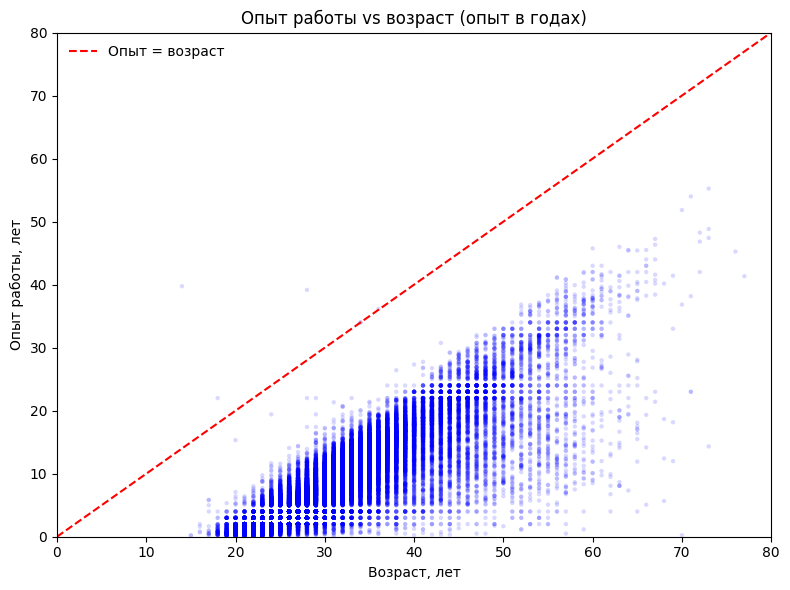

In [38]:
plot_df = (
    df[["Возраст", "Опыт работы (месяц)"]]
    .dropna()
    .assign(Опыт_годы=lambda df: df["Опыт работы (месяц)"] / 12)
)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(
    plot_df["Возраст"],
    plot_df["Опыт_годы"],
    s=10,
    alpha=0.15,
    color="blue",
    edgecolors="none",
)

ax.plot([0, 100], [0, 100], color="red", linestyle="--", label="Опыт = возраст")

ax.set_xlabel("Возраст, лет")
ax.set_ylabel("Опыт работы, лет")
ax.set_title("Опыт работы vs возраст (опыт в годах)")
ax.set_xlim(0, 80)
ax.set_ylim(0, 80)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

In [39]:
plot_df = df[["Возраст", "Опыт работы (месяц)"]].dropna()
plot_df["Опыт_годы"] = plot_df["Опыт работы (месяц)"] / 12
points_above = (plot_df["Опыт_годы"] > plot_df["Возраст"]).sum()
print(f"Точек строго выше линии: {points_above}")

Точек строго выше линии: 5


Почти все точки лежат ниже диагонали, видно что чем больше возраст тем выше стаж

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


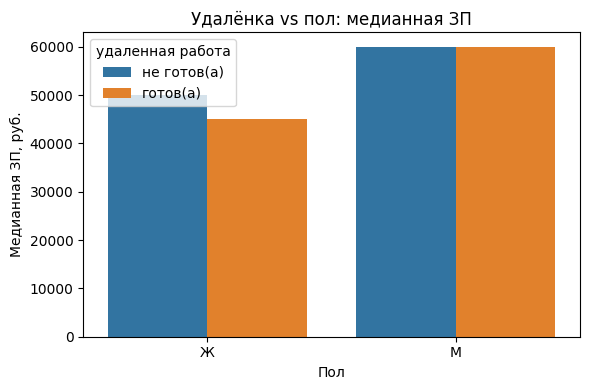

  Пол удаленная работа  ЗП (руб)
3   М         готов(а)   60000.0
2   М      не готов(а)   60000.0
0   Ж      не готов(а)   50000.0
1   Ж         готов(а)   45000.0


In [40]:
remote_salary = (
    df.loc[:, ["ЗП (руб)", "удаленная работа", "Пол"]]
    .groupby(["Пол", "удаленная работа"])["ЗП (руб)"]
    .median()
    .reset_index()
)

remote_salary["удаленная работа"] = remote_salary["удаленная работа"].map(
    {1: "готов(а)", 0: "не готов(а)"}
)

plt.figure(figsize=(6, 4))
sns.barplot(data=remote_salary, x="Пол", y="ЗП (руб)", hue="удаленная работа")
plt.ylabel("Медианная ЗП, руб.")
plt.title("Удалёнка vs пол: медианная ЗП")
plt.tight_layout()
plt.show()

print(remote_salary.sort_values("ЗП (руб)", ascending=False))

Женщины менее готовы к удаленке чем мужчины, мужчины 50/50

/tmp/ipykernel_21948/516542308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_emp.index, y=salary_emp.values, palette="viridis")


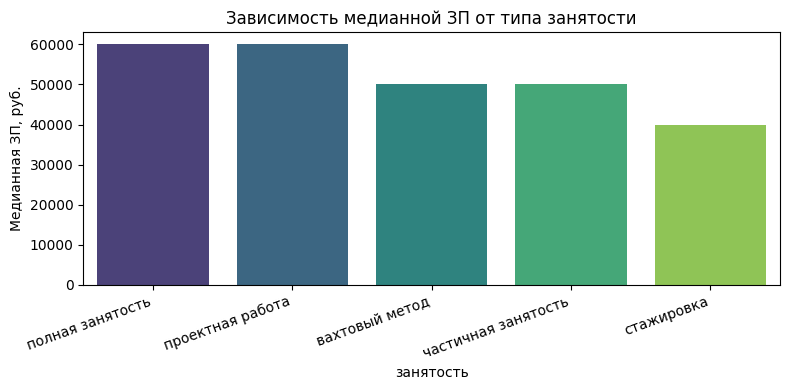

занятость
полная занятость       60000.0
проектная работа       60000.0
вахтовый метод         50000.0
частичная занятость    50000.0
стажировка             40000.0
Name: ЗП (руб), dtype: float64


In [41]:
employment_cols = [
    "полная занятость",
    "частичная занятость",
    "проектная работа",
    "стажировка",
    "вахтовый метод",
]

salary_emp = (
    df.loc[:, ["ЗП (руб)"] + employment_cols]
    .melt(id_vars="ЗП (руб)", var_name="занятость", value_name="флаг")
    .query("флаг == 1")
    .groupby("занятость")["ЗП (руб)"]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 4))
sns.barplot(x=salary_emp.index, y=salary_emp.values, palette="viridis")
plt.xticks(rotation=20, ha="right")
plt.ylabel("Медианная ЗП, руб.")
plt.title("Зависимость медианной ЗП от типа занятости")
plt.tight_layout()
plt.show()

print(salary_emp)

На стажировке запрашивают меньше всего денег, на полной занятости и проектной работе больше всего

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [42]:
idx_to_drop = df_duplicates[df_duplicates.duplicated()].index
df.drop(index=idx_to_drop, inplace=True)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [43]:
df.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
волонтерство                         0
полная занятость                     0
проектная работа                     0
стажировка                           0
частичная занятость                  0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [44]:
df.dropna(
    subset=("Последняя/нынешняя должность", "Последнее/нынешнее место работы"),
    inplace=True,
)
df.fillna({"Опыт работы (месяц)": df["Опыт работы (месяц)"].median()}, inplace=True)
round(df["Опыт работы (месяц)"].mean())

113

In [45]:
np.ceil(df["Опыт работы (месяц)"].mean())

np.float64(114.0)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [46]:
mask = (df["ЗП (руб)"] > 1e6) | (df["ЗП (руб)"] < 1000)
display(df[mask].shape)
df = df[~mask]

(89, 23)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [47]:
mask = df["Опыт работы (месяц)"] / 12 >= df["Возраст"]
display(df[mask].shape)
df = df[~mask]

(7, 23)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

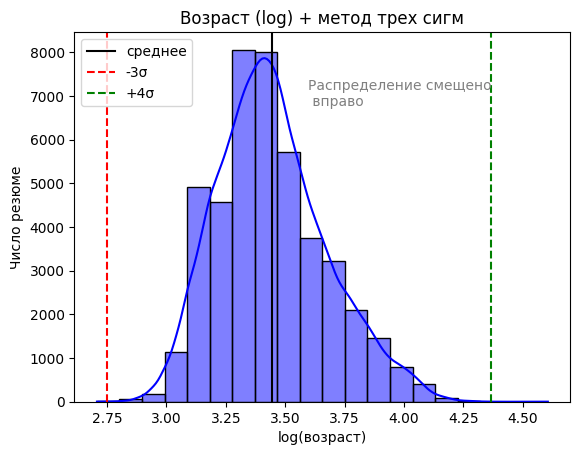

,Возраст,log_возраст,z_score
31137,15,2.70805,-3.186345
32950,15,2.70805,-3.186345
33654,100,4.60517,5.027560


In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

age = df["Возраст"]
log_age = np.log(age)

mu = log_age.mean()
sigma = log_age.std(ddof=1)

fig, ax = plt.subplots()
histplot = sns.histplot(log_age, bins=20, kde=True, ax=ax, color="blue")

histplot.axvline(mu, color="black", label="среднее")
histplot.axvline(mu - 3 * sigma, color="red", ls="--", label="-3σ")
histplot.axvline(mu + 4 * sigma, color="green", ls="--", label="+4σ")

ax.text(
    mu + 0.15,
    histplot.get_ylim()[1] * 0.8,
    "Распределение смещено\n вправо",
    fontsize=10,
    color="gray",
)
ax.set_title("Возраст (log) + метод трех сигм")
ax.set_xlabel("log(возраст)")
ax.set_ylabel("Число резюме")
ax.legend()
plt.show()

z = (log_age - mu) / sigma

mask_outliers = (z < -3) | (z > 4)
age_outliers = age[mask_outliers]

display(
    age_outliers.to_frame(name="Возраст").assign(
        log_возраст=np.log(age_outliers), z_score=z[mask_outliers]
    )
)

df = df.loc[~mask_outliers].copy()

Лог распределение смещенно в правую сторону